In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [2]:
n_samples = 5 * np.ones(4)
dose = np.array([-0.86,-0.3,-.05,.73])
deaths = np.array([0,1,3,5])

In [3]:
with pm.Model() as ld50_model:
    alpha = pm.Normal('alpha',0,sd=100)
    beta = pm.Normal('beta',0,sd=100)
    
    theta = pm.invlogit(alpha + beta*dose)
    d = pm.Binomial('deaths',
                     n=n_samples,
                     p=theta,
                     observed=deaths)

In [4]:
with ld50_model:
    trace = pm.sample(1000,njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1704.28draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6821907079966569, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [7]:
a = trace['alpha']
b = trace['beta']

(array([ 31.,  76., 131., 129., 211., 179., 212., 166., 165., 124., 113.,
        114.,  75.,  59.,  65.,  39.,  37.,  20.,  14.,   9.,   5.,  10.,
          5.,   6.,   2.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.70110156,  2.92912579,  4.15715003,  5.38517426,  6.61319849,
         7.84122272,  9.06924696, 10.29727119, 11.52529542, 12.75331965,
        13.98134388, 15.20936812, 16.43739235, 17.66541658, 18.89344081,
        20.12146504, 21.34948928, 22.57751351, 23.80553774, 25.03356197,
        26.2615862 , 27.48961044, 28.71763467, 29.9456589 , 31.17368313,
        32.40170736, 33.6297316 , 34.85775583, 36.08578006, 37.31380429,
        38.54182852]),
 <a list of 30 Patch objects>)

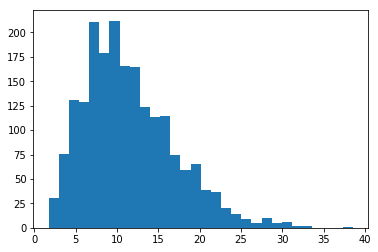

In [11]:
plt.hist(b,bins=30)

In [12]:
ld50 = -a/b

(array([  2.,   3.,   3.,   8.,  27.,  60., 103., 220., 298., 394., 313.,
        231., 123.,  75.,  53.,  42.,  14.,   9.,   5.,   3.,   4.,   0.,
          2.,   1.,   2.,   2.,   0.,   1.,   1.,   1.]),
 array([-4.37492075e-01, -4.03830580e-01, -3.70169085e-01, -3.36507590e-01,
        -3.02846095e-01, -2.69184600e-01, -2.35523105e-01, -2.01861610e-01,
        -1.68200115e-01, -1.34538620e-01, -1.00877125e-01, -6.72156304e-02,
        -3.35541354e-02,  1.07359519e-04,  3.37688545e-02,  6.74303494e-02,
         1.01091844e-01,  1.34753339e-01,  1.68414834e-01,  2.02076329e-01,
         2.35737824e-01,  2.69399319e-01,  3.03060814e-01,  3.36722309e-01,
         3.70383804e-01,  4.04045299e-01,  4.37706794e-01,  4.71368289e-01,
         5.05029784e-01,  5.38691279e-01,  5.72352774e-01]),
 <a list of 30 Patch objects>)

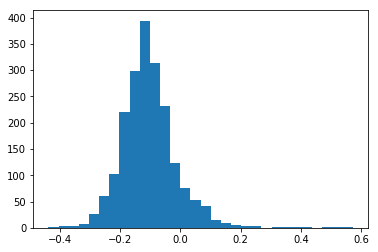

In [13]:
plt.hist(ld50,bins=30)

In [14]:
print(np.percentile(ld50,[2.5,25,50,75,97.5]))

[-0.26421624 -0.15975536 -0.11055479 -0.05809279  0.09011513]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c203d4a20>,
      dtype=object)

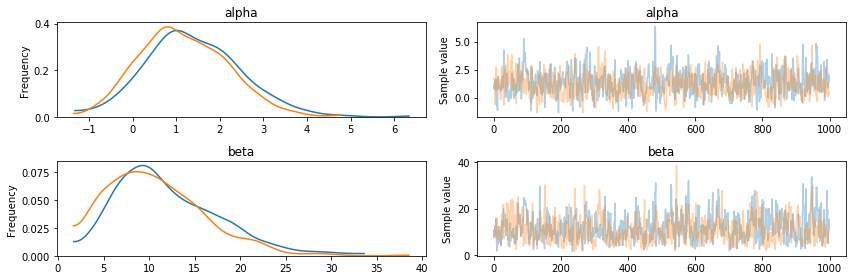

In [15]:
pm.traceplot(trace)

In [16]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.273822,1.059217,0.044138,-0.790540,3.288201,470.189983,1.011786
beta,11.472655,5.508642,0.253925,2.416357,22.116029,372.866950,1.012499
